In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra, Polynomials
using NonLinearDynamicsCourse
import NonLinearDynamicsCourse as nld

WebIO._IJuliaInit()

# Resonancias No lineales, respuestas a un Forzado

Los auto-osciladores se diferencian fundamentalmente de un oscilador harmonico forzado porque no necesitan de una frecuencia externa que se sintonice a su frecuencia de resonancia, el propio auto-oscilador setea su propia frecuencia y fase a partir de su dinamica intrinseca.

En este sentido son osciladores activos, no solo porque tienen su propia fuente de energia sino porque intentan mantener en la medida de lo posible su propia frecuencia de oscilacion cuando son sometidos a un forzado externo, pero cuando la frecuencia del forzado externo se aparta de su auto-frecuencia la respuesta es no trivial. 

A diferencia del oscilador armónico que siempre se somete a la frecuencia del forzado y su unica libertad de respuesta esta en la amplitud y fase de la oscilación, la respuesta del auto-oscilador a un forzado puede ser muy compleja, multiperiódica o cuasi-periódica (pudiendo llegar a ser completamente aperiódica o caótica como en el caso del auto-oscilador de Duffing-Van der Pol que vamos a ver mas adelante)

## Van der Pol Forzado

En el caso de oscilador de Van der Pol introducimos el forzado como una fuerza periodica con dos parametros de control: la frecuencia angular $\omega$ y la amplitud del forzado $A$. Como es una fuerza, se agrega como un termino en la segunda ecuacion, junto con la fuerza restitutiva $-x$ y la disipacion no lineal $\mu(1-x^2)y$. 

Sin embargo, antes de escribir las ecuaciones conviene recordar que cuando definimos un sistema dinamico dijimos que las reglas de evolucion, dadas por las ecuaciones diferenciales eran fijas y no se modificaban en el tiempo. Sin embargo, siempre podemos escribir un sistema uqe depende del tiempo 'inventando' el tiempo como una nueva variable, o en el caso de una funcion periodica, la fase del forzado $\phi$. De esta forma podemos escribir el Van der Pol forzado de la siguiente forma.

$\dot{x} = y$

$\dot{y} = \mu (1 -x^2)y - x + A cos(\phi)$

$\dot{\phi} = \omega$

al costo de agregar una dimension mas, el flujo ahora es 3D. La evolucion de la tercera variable es trivial ya que como corresponde a la fase avanza linealmente en el tiempo como $\omega t$. Como esta variable entra en las primeras dos ecuaciones solo a traves de un seno podemos considerar que la tercera dimension es periodica (formalmente podriamos considerar el espacio $\mathbb R \times \mathbb R \times S^1$)
Si proyectamos en el plano $(x,y)$ debemos tener en cuenta que ahora sobre el espacio de fases (o mejor dicho sobre su proyeccion) vamos a ver trayectorias que se cruzan pero que corresponden a dos coordenadas de $\phi$ diferentes.


In [2]:
function fvdp!(du,u,p,t)
    du[1] = u[2]
    du[2] = p[1]*(1.0-u[1]*u[1])*u[2]-u[1]+p[2]*cos(u[3])
    du[3] = p[3]
    du
end    

fvdp! (generic function with 1 method)

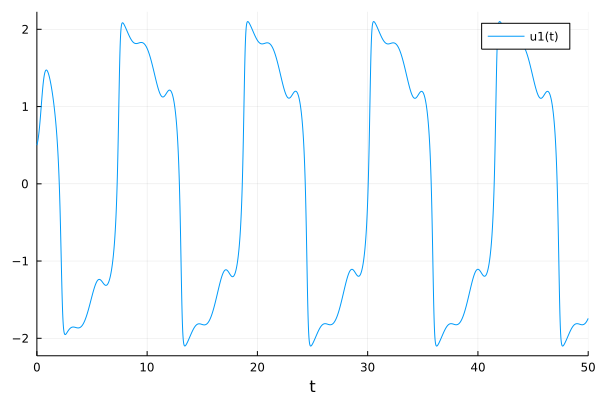

In [3]:
sol=solve(ODEProblem(fvdp!,[0.5,0.5,0],(0,50),[4.21,2.35,2.75]))
plot(sol,vars=(0,1))

In [4]:
# En la notebook esta celda es interactiva
#(μ,A,ω)=[1.3,1.1,1.55];tcycles=10; ncycles=200
@manipulate throttle=0.5 for μ=0.0:0.01:4.5, A=0:0.01:3.0, ω=0.1:0.01:3.0, ncycles=1:200
    flux2d_forced(fvdp!,[0.5,0.5,0],[μ,A,ω],2*pi/ω; tcycles=10,ncycles=ncycles)
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 451, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
226, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008949cc90, Task (runnable) @0x000000008949cc90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

En el grafico de la izquierda se representan las trayectorias en el espacio de fases $(x,y,\phi/2\pi)$, y en el de la derecha la proyeccion en el plano $(x,y)$ (el espacio de fases de la izquierda visto desde arriba). Tener en cuenta que la variable $\phi$ es una fase, por lo tanto las trayectorias que abandonan el plano de arriba aparecen por abajo con el punto del mismo color. Probar poner la cantidad de ciclos (ncycles) en un numero bajo para entender como son las orbitas. 

En este sistema resulta facil encontrar soluciones con enganche de fase, es decir con una relacion entera de periodo con el forzado. Por ejemplo para valores de $(\mu=2.5,A=2.37,\omega=1.54)$, una orbita de periodo dos. Para verla con mas claridad se puede subir el parametro del transitorio (el tiempo que integra pero no grafica el resultado) tcycles a 10.
Una orbita de periodo tres para $(\mu=2.5,A=2.26,\omega=2.26)$. Periodo cuatro para $(\mu=4.05,A=2.71,\omega=2.52)$. Periodo cinco para $(\mu=4.21,A=2.35,\omega=2.75)$, etc.

Tambien se observan orbitas cuasiperiodicas, sobre todo para bajos valores de $A$. Estas orbitas llenan de forma densa una superficie tipo ''Tubo'' que si conectamos la parte de arriba con la de abajo forma un toro (rosquilla o donna) y si bien no son periodicas no corresponden a lo que luego vamos a ver que son trayectorias caoticas.


## Seccion de Poincare

Una representacion muy util para flujos periódicos cuasiperiódicos (y como veremos luego tambien caóticos) es la seccion de Poincaré (o mapa de Poincaré). Para flujos en tres dimensiones consiste en tomar un plano que sea **transversal** al flujo (es decir que ninguna orbita sea paralela a el) y tomar la interseccion de las trayectorias con ese plano como puntos ${x_i}$. Podemos estudiar entonces la dinamica de esos puntos sobre el plano de la sección de Poincaré como un mapa (de ahi el nombre de mapa de Poincaré): $x_{i+1} = P(x_i)$, donde la función $P$ se obtiene integrando la trayectoria desde el punto dado por la interseccion del flujo sobre el plano $x_i$ hasta la proxima intersección con el plano $x_{i+1}$ (ver figura)


<div>
<img src="../files/Poincare_map.gif" width="250px">
</div>

Entonces una orbita periódica en el flujo original corresponde a un punto fijo en el mapa, si la orbita tiene un período igual al tiempo del retorno al plano, o a puntos periodicos (que vuelven luego de un numero entero de iteraciones al mismo punto) si la orbita cerrada cruza varias veces el plano.

Para el caso de los sistemas forzados la elección de la sección de Poincaré es obvia porque al ser la tercera dimensión periódica basta con elegir un plano de fase constante. Sin perdida de generalidad podemos elegir $\phi=0$. En ese caso los puntos sobre la seccion de Poincaré corresponden a los puntos en el grafico anterior. 

La funcion poincare_forced puede representar directamente ncycles puntos de esta seccion de Poincare para una fase determinada $\phi$ (0 por defecto) luego de esperar tcycles. 

Notar que los puntos convergen a una orbita periodica o a un atractor a lo largo de una curva que bordea un ciclo en el caso de las orbitas cuasiperiodicas (y que corresponden al corte del toro con el plano de Poincare).

In [5]:
# En la notebook esta celda es interactiva
#ncycles = 1000
@manipulate throttle=0.5 for μ=0.0:0.01:5.0, A=0:0.01:3.0, ω=0.1:0.01:3.0, ncycles=11:500
    poincare_forced(fvdp!,[0.5,0.5,0],[μ,A,ω],2*pi/ω; tcycles=10,ncycles=ncycles,size=(900,600))
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
251, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007618d910, Task (runnable) @0x000000007618d910), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

## Recurrence Plot

Una buena forma de visualizar la periodicidad es mediante un **recurrence plot** donde las estructuras periodicas se ven como lineas diagonales y el periodo es el espaciamiento entre las lineas. Como referencia se muestra ademas el periodo del forzado.



In [6]:
# En la notebook esta celda es interactiva
#dd = 0.005; ncycles=20; npts=270
@manipulate throttle=1.0 for μ=0.0:0.01:3.0, A=0:0.01:2.0, ω=0:0.01:2.0, ncycles=10:30,dd=0.001:0.001:0.01,npts=50:10:500
    recurrence_plot(fvdp!,[1.0,1.0,0.0],[μ,A,ω],2*pi/ω;dd=dd,npts=npts,tcycles=10,ncycles=ncycles)
end    


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000089e8e270, Task (runnable) @0x0000000089e8e270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

# Oscilador de Duffing Forzado

Para ver otro sistema forzado periodico donde la respuesta es mucho mas irregular volvemos al oscilador de Duffing (con friccion lineal). Recordar que llegamos a este sistema escribiendo primero la ecuacion del oscilador armonico de forma general con una fuerza de restitucion $K(x)$

$\dot{x}=y$

$\dot{y}=-\mu y + K(x)$

y eligiendo una fuerza de restitucion con un termino lineal y uno cubico

$K(x) = \beta x - x^3$

Como para valores de $x$ grande va a dominar el termino cubico esta garantizado que el sistema es globalmente atractor porque si $x$ es muy positivo $-K(x)$ es muy negativo y viceversa.

El oscilador de Duffing NO es un auto oscilador porque no tiene friccion negativa (inyeccion de energia). De todas formas lo que nos interesa estudiar aca es el oscilador de Duffing forzado:

$\dot{x} = y$

$\dot{y} = -\mu y + \beta x -  x^3 + A cos(\phi)$

$\dot{\phi} = \omega$

In [7]:
function duffing_forced!(du,u,p,t)
    (μ,β,A,ω)=p
    du[1] = u[2]
    du[2] = -μ*u[2]+u[1]*(β-u[1]*u[1])+A*cos(u[3])
    du[3] = ω
    du
end    

duffing_forced! (generic function with 1 method)

In [8]:
# En la notebook esta celda es interactiva
@manipulate throttle=0.5 for μ=0.0:0.01:2.0, β=-2.0:0.01:2.0,A=0:0.01:1, ω=0:0.01:1, x0=-2.0:0.01:2.0,ncycles=4:200
    flux2d_forced(duffing_forced!,[x0,0.0,0.0],[μ,β,A,ω],2*pi/ω;tcycles=0,ncycles=ncycles,xlims=(-2,2),ylims=(-1.5,1.5))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000079a352d0, Task (runnable) @0x0000000079a352d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

Como se puede apreciar jugando un poco con los parametros el repertorio de comportamientos es mucho mas variado. Una buena forma de explorarlo es partiendo del sistema sin forzar con $A=0$ y un valor fijo de los otros parametros (recordar el efecto que tenian $\beta$ y $\mu$ sobre el sistema original). Por ejemplo con $\beta>0$ tenemos el potencial de doble pozo. En ese caso recordar que teniamos un punto fijo tipo silla en el origen y pos focos atractores simetricos en $x^*_{2,3} = \pm \sqrt{\beta}$. Para valores de $A$ pequeños los atractores se tranforman en ciclos limites atractores con el periodo del forzado. Para valores de $A$ intermedios aparecen otros ciclos atractores (a traves de una bifurcacion de nodo silla de ciclos limites) rodeando el ciclo limite menor. Tambien pueden aparecer ciclos limites atractores que rodean ambos pozos y con diferentes valores de periodo como multiplos enteros del forzado.

Por su parte el punto silla del sistema sin forzar se transforma en un ciclo limite tipo saddle, es decir que no es atractor (salvo en una direccion determinada), pero que al igual que en los sistemas 2D organiza el flujo. Mas adelante vamos a ver que las variedades estable e inestable de la orbita tipo saddle (que en realidad son como hojas dobladas en 3D) son importantes para entender la organizacion del flujo y la aparicion de caos.

La coexistencia de estos ciclos limites atractores ya hace de por si el comportamiento mas complejo e impredecible (probar variar la condicion inicial a lo largo del eje horizontal por ejemplo para los valores $\mu=0.14,\beta=1,A=0.1,\omega=1$ para ver los distintos destinos posibles dependiendo del punto de partida o $A=0.24$ para un comportamiento mas complejo). 

Sin embargo para ciertos valores de parametros y condiciones iniciales la orbita parece no converger nunca a un atractor y quedar dando vueltas siguiendo un recorrido irregular (por ejemplo para  $\mu=0.14,\beta=1,A=0.27,\omega=1$). A diferencia de las orbitas cuasiperiodicas los puntos para $\phi=0$ (o sea la sección de Poincaré) no forman una curva unidimensional sino una estructura mas complicada. Vamos a ver que esto es un nuevo tipo de atractor (llamado "extraño" y que tiene estructura fractal) y que es una signatura del caos.

Pero antes vamos a explorar la coexistencia de atractores y definir la cuenca de atracción de un atractor. Si exploramos distintas condiciones iniciales en el caso sugerido anteriormente con valores de $A=0.1$ y $A=0.24$:

In [12]:
# En la notebook esta celda es interactiva
(μ,β,A,ω)=[0.14,1.0,0.2,1.0];y0=-0.1; ncycles=200
@manipulate throttle=0.5 for A=0:0.01:0.3, y0=-1.0:0.001:2.0,ncycles=31:300
    flux2d_forced(duffing_forced!,[0,y0,0.0],[μ,β,A,ω],2*pi/ω;tcycles=30,ncycles=ncycles,xlims=(-2.5,2.5),ylims=(-2.0,2.0))
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["A"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 31, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000086f815f0, Task (runnable) @0x0000000086f815f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\"

Para $A=0.1$ hay cuatro ciclos limites atractores: dos aproximadamente simetricos en torno a $(1,0)$ y $(-1,0)$ y otros dos ciclos mayores encerrando a esos dos. En este caso elegimos variar la coordenada inicial $y0$ porque es mas sencillo encontrar condiciones iniciales que vayan a parar a cada uno de los atractores.

Para valores de $A$ mayores los ciclos limites mayores desaparecen y aparece una orbita de periodo tres y luego una orbita de periodo uno que rodea los dos atractores (ver $A=0.24$), ademas de los otros dos ciclos limites atractores que crecieron de tamaño. Para este valor tambien parece haber orbitas aperiodicas pero si se evoluciona la cantidad suficiente de ciclos se ve que termina yendo a parar a uno de los tres atractores. Esto es lo que se conoce como "caos transitorio".

## Cuencas de Atraccion

Una nocion importante y que nos va a permitir caracterizar la complejidad creciente del comportamiento de este sistema es la de cuenca de atraccion.

La cuenca de atraccion de un determinado atractor (por ejemplo un ciclo limite que en la seccion de poincare corresponde a un punto fijo o a un conjunto de puntos periodicos), esta definida por todas aquellas condiciones iniciales que convergen a dicho atractor para tiempos largos. 

Para determinar las cuencas es necesario evolucionar durante varios ciclos una grilla de varios miles de condiciones iniciales, por lo tanto los graficos que siguen pueden ser muy demandantes. Ejecutar primero con un valor bajo de delta (la resolucion de la grilla) y asegurarse de que Julia este tomando en Threads.nthreads() la cantidad total de procesadores para poder paralelizar el problema. 

solved
plotting...


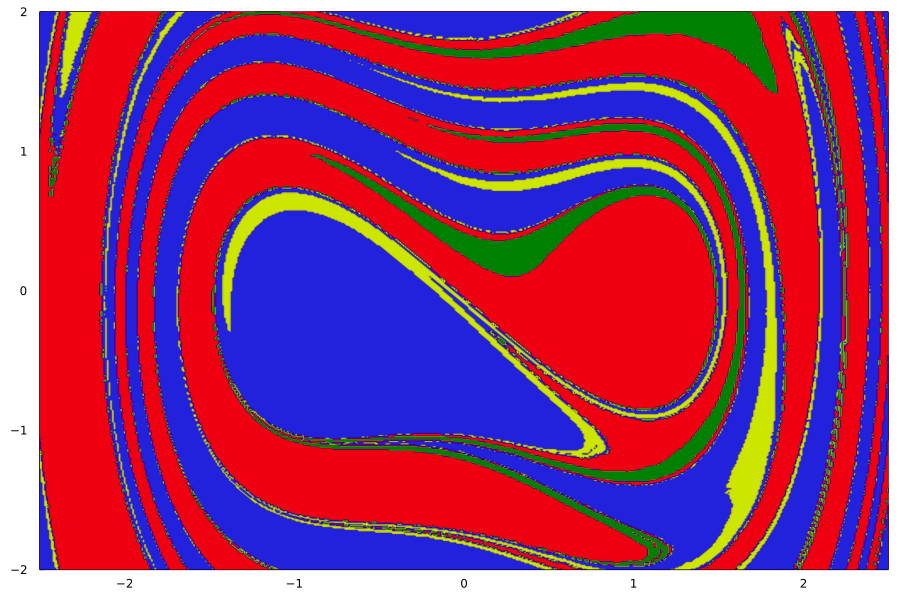

In [9]:
p = [0.14,1.0,0.1,1.0]
attractors=[[1.0,0.0],[-1.0,0.0],[-1,0.7],[0.3,0.3]]
maxdist = 0.3
period = 2*pi
p1=attractor_basin(duffing_forced!,p,attractors,0.3;delta=0.01,tmax=30*period,xlims=(-2.5,2.5),ylims=(-2.0,2.0))

En este caso estamos graficando las cuencas de atraccion de los cuatro ciclos limites (los dos pequeños en azul y rojo) y los dos grandes en verde y amarillo) para $A=0.1$. Como puede verse las cuencas de atraccion presentan una estuctura fina, sobre todo serca de las transiciones, donde una pequeña perturbacion en las condiciones iniciales puede llevar a destinos muy distintos. Es importaante destacar que esto no es todavia "caos" porque esa sensibilidad se da solo en regiones muy delgadas cerca de las transiciones, sin embargo ya se puede ver que las cuencas se empiezan a mezclar como si se estuviese revolviendo pigmentos que no se disuelven entre si.

solved
plotting...


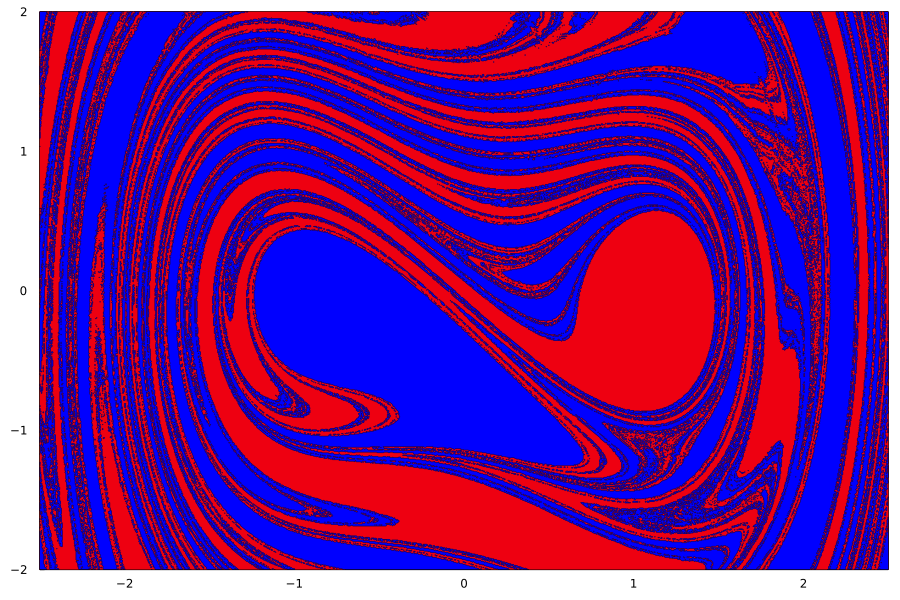

In [10]:
p = [0.14,1.0,0.14,1.0]
attractors=[[1.1,0.0],[-0.8,0.0]]
p1=attractor_basin(duffing_forced!,p,attractors,0.3;delta=0.005,tmax=30*period,xlims=(-2.5,2.5),ylims=(-2.0,2.0))

 En este caso si bien tenemos solo dos atractores ya se forman zonas donde resulta muy dificil distinguir a cual de las cuencas pertenece el punto inicial. Podemos hacer zoom a una de esas zonas en torno a $(0.3,0.2)$

solved
plotting...


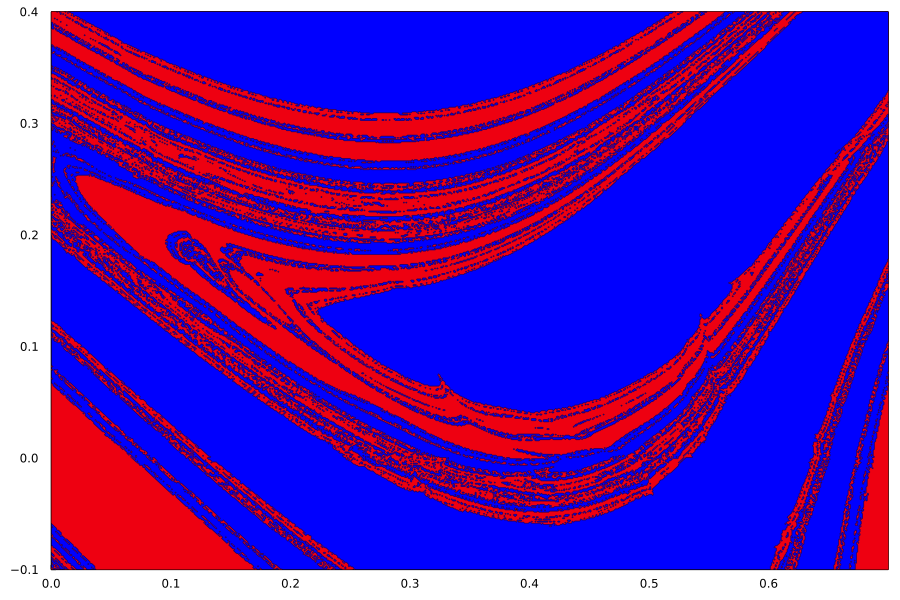

In [11]:
p1=attractor_basin(duffing_forced!,p,attractors,0.3;delta=0.001,tmax=30*period,xlims=(0.0,0.7),ylims=(-0.1,0.4))

Como se ve es una estructura que tiene mucho detalle que va formando zonas con "filamentos" donde es muy dificil acertar en cual de los dos ciclos va terminar la condicion inicial.
A medida que $A$ de incrementa esa estructura filamentada (mas adelante vamos a ver que se trata de una estructura fractal) va llenando el plano.

solved
plotting...


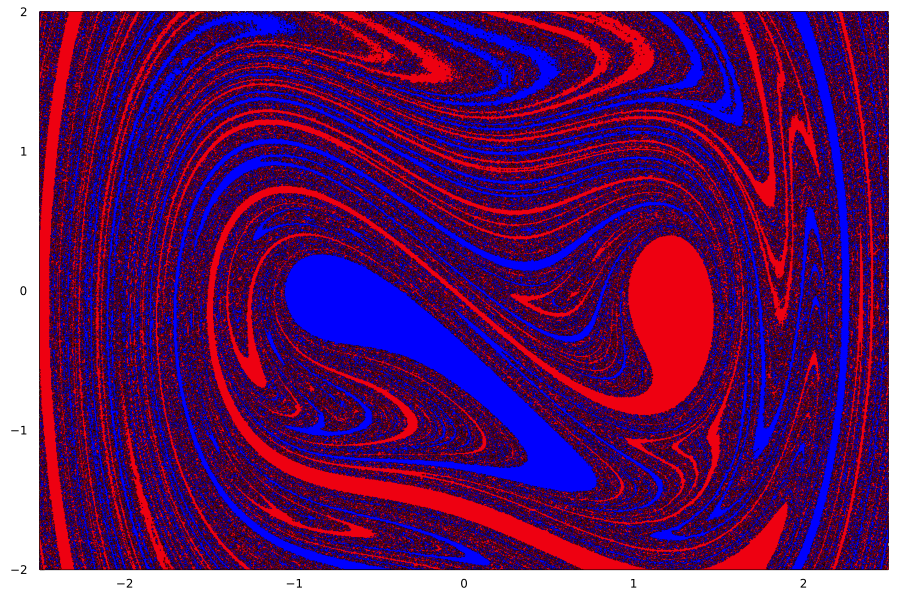

In [12]:
p = [0.14,1.0,0.2,1.0]
attractors=[[1.2,0.0],[-0.7,0.0]]
p1=attractor_basin(duffing_forced!,p,attractors,0.3;delta=0.005,tmax=30*period,xlims=(-2.5,2.5),ylims=(-2.0,2.0))

En este caso salvo para algunas islas crecanas a los puntos fijos, la gran mayoria de la seccion de Poincaré esta ocupada por el limite fractal entre ambas cuencas de atraccion por lo tanto de forma general no es posible adivinar en cual de las dos orbitas atractoras va a terminar el flujo pero si se save que va a terminar en una de las dos. Se comporta como una tirada de moneda o un a ruleta con dos valores.

solved
plotting...


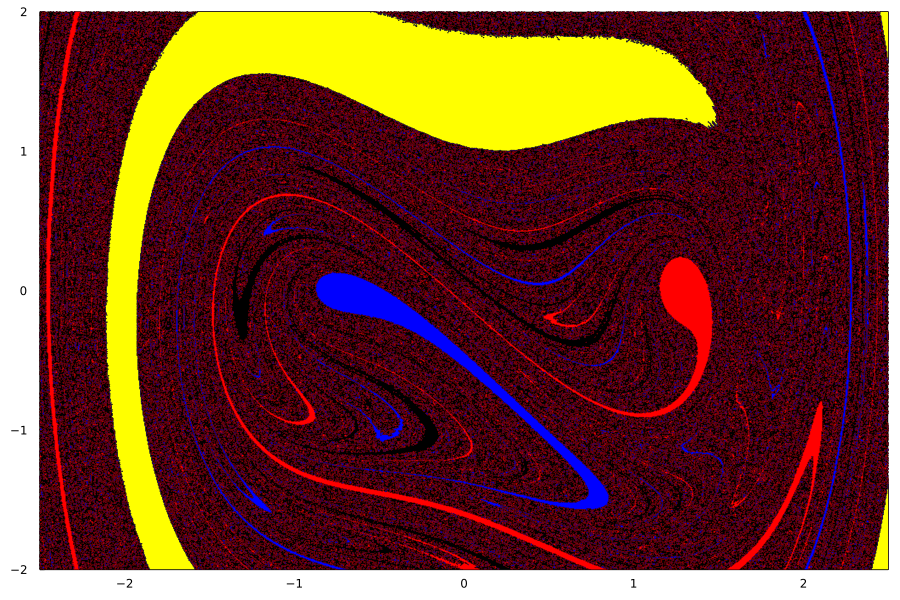

In [13]:
p = [0.14,1.0,0.24,1.0]
attractors=[[1.2,0.0],[-0.7,0.0],[0.1,1.1]]
p1=attractor_basin(duffing_forced!,p,attractors,0.3;delta=0.005,tmax=30*period,xlims=(-2.5,2.5),ylims=(-2.0,2.0))

Finalmente en este caso aparecen dos atractores mas: la orbita de periodo tres que no esta coloreada pero deberia corresponder a los fragmentos negros, y la orbita de periodo igual al fdorzado que rodea a todas las anteriores con la cuenca de atraccion en amarillo. Recordar que en este caso Todas las condiciones iniciales convergen a una orbita periodica atractora. Las regiones donde el azul, rojo y negro forman un granulado pueden originarse por fibras mas finas que la resolucion de la grilla. Tambien puede suceder que no hayan convergido luego de 30 ciclos a ningun atractor (en ese caso dan un punto negro)

## Atractor Extraño

Para valores mayores de $A$ las trayectorias ya no convergen a ciclos limites sino a un conjunto con estructura fractal conocido como **atractor extraño**. Sobre la seccion de Poincare es un conjunto de puntos que a diferencia del generado por toro formado por orbitas cuasiperiodicas, no esta confinado a una curva. Veamos la seccion de poincare para un valor $A=0.27$ que da lugar a un atractor extraño:


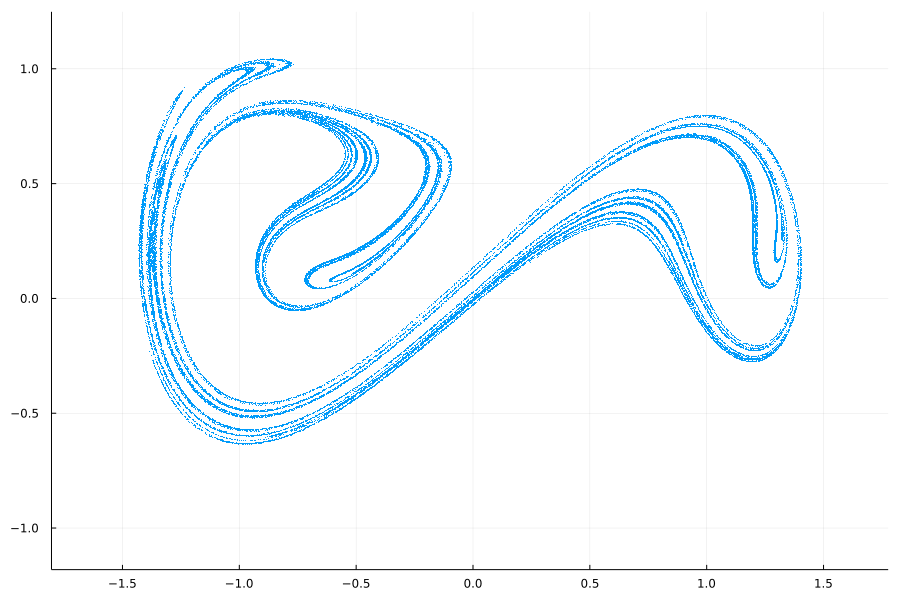

In [20]:
u0 = [0.5,0.5,0]
p = [0.14,1.0,0.27,1.0]
poincare_forced(duffing_forced!,u0,p,2*pi; tcycles=30,ncycles=50000,size=(900,600))

No confundir esta estructura con la de las cuencas de atraccion. Estos puntos son el conjunto limite (que en el caso de los ciclos corresponden a un solo punto) y esta formado por infinitos puntos que forman una estructura fractal. En este caso la cuenca de atraccion ocupa todo el plano pero para otros valores de $a$ puede coexistir con orbitas periodicas.

Si hacemos zoom $\times 10$ a un detalle del atractor vemos que tiene una estructura con mas detalle aun:

30018
872


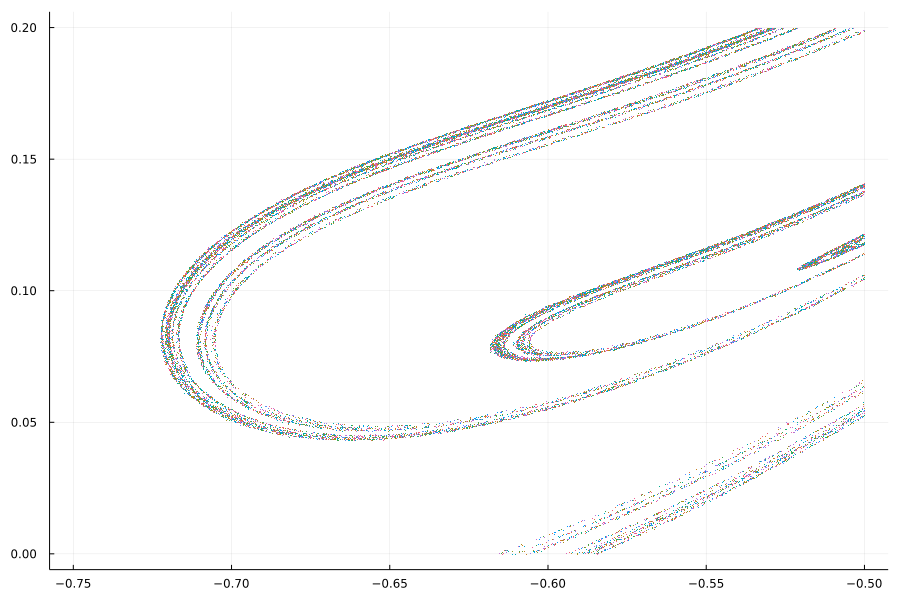

In [24]:
poincare_forced_zoom(duffing_forced!,u0,p,2*pi;npts=30000,maxiter=1000,size=(900,600),xlims=[-0.75,-0.5],ylims=[0,0.2])

El grafico de recurrencia no muestra ninguna estructura.

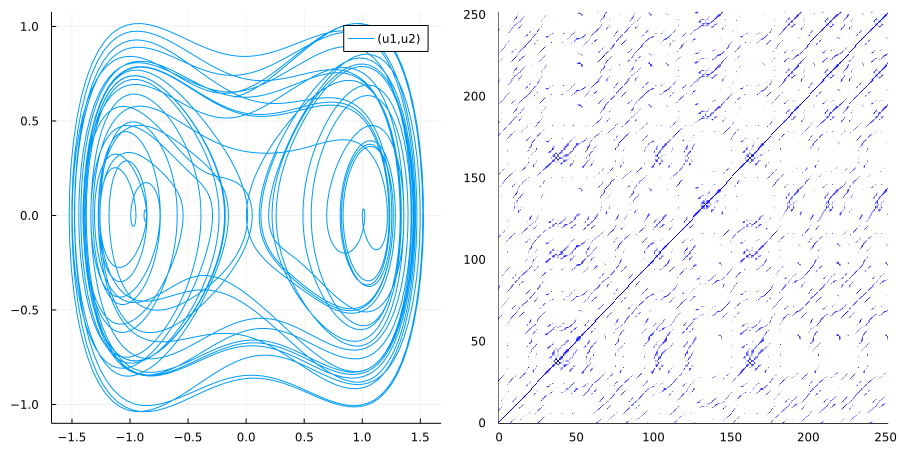

In [25]:
recurrence_plot(duffing_forced!,u0,p,2*pi/1.0;dd=0.005,tcycles=30,npts=400,ncycles=40)

## Variedades estable e inestable en la seccion de Poincare

Para entender como se desarrolla el caos (despues vamos a dar una definicion mas rigurosa) conviene estudiar las variedades estable e inestable de la orbita saddle (o bien el punto silla del mapa). Primero vamos a usar la funcion saddle_orbit2D para localizar el punto silla. Es necesario proporcionarle un guess inicial, asi que partimos primero desde un valor 

In [10]:
function duffing_jac(u,p)
  J = Array{Float64, 2}(undef, 3, 3)
  J[1,1] = 0
  J[1,2] = 1.0
  J[1,3] = 0.0  
  J[2,1] = p[2]-3.0*u[1]*u[1]
  J[2,2] = -p[1]  
  J[2,3] = -p[3]*sin(u[3]) 
  J[3,1] = 0.0
  J[3,2] = 0.0
  J[3,3] = 0.0  
  return J
end

duffing_jac (generic function with 1 method)

### Calculo de una orbita saddle

Para calcular las variedades del punto silla primero tenemos que ubicar el punto silla, que no solo se desplaza del origen sino que al igual que los atractores se transforma en un ciclo límite, pero inestable, tambien llamado ciclo límite saddle, atractor en una direccion y repulsor en la otra.

In [11]:
p = [0.14,1.0,0.1,1.0]
p = [0.14,1.0,0.27,1.0]
period = 2*pi
us,conv = saddle_orbit2D(duffing_forced!,[-0.127,0.0],p,period)

([-0.1353259460095771, 0.009581106361177214], true)

[-0.049805038217478954, 0.0034914650099138207]


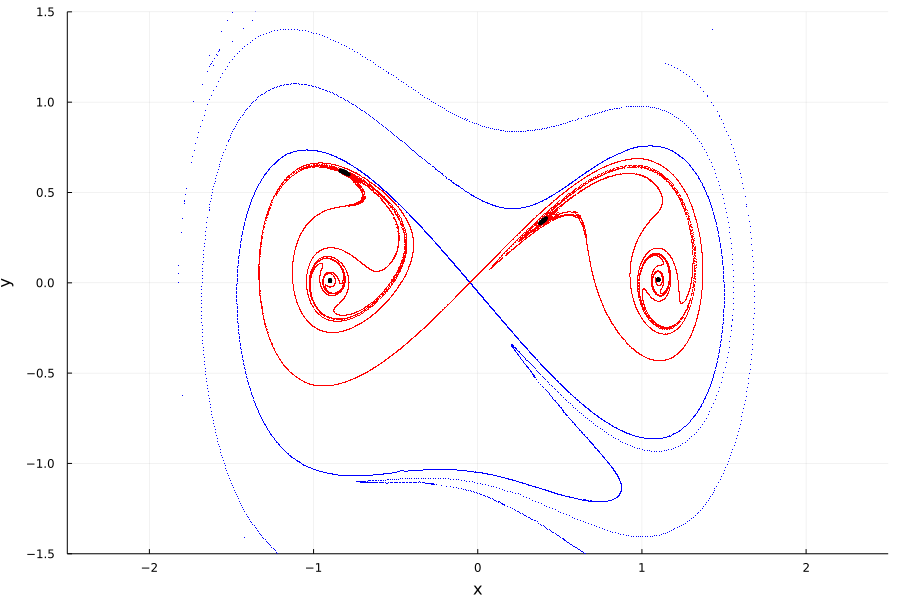

In [22]:
p = [0.14,1.0,0.1,1.0]
period = 2*pi
npts = 1500
us,conv = saddle_orbit2D(duffing_forced!,[-0.05,0.0],p,period)
if conv
    println(us)
    p1=saddle_manifolds_forced(duffing_forced!,duffing_jac,us,p,period;ncycles=[8,2],npts=npts,delta=10^(-4))
    nld.poincare_forced!(p1,duffing_forced!,[1.2,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    nld.poincare_forced!(p1,duffing_forced!,[-0.8,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    nld.poincare_forced!(p1,duffing_forced!,[-1,0.7,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    nld.poincare_forced!(p1,duffing_forced!,[0.3,0.3,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    xlims!(p1,(-2.5,2.5)); ylims!(p1,(-1.5,1.5))
end


[-0.06979343794276711, 0.004899991530597684]


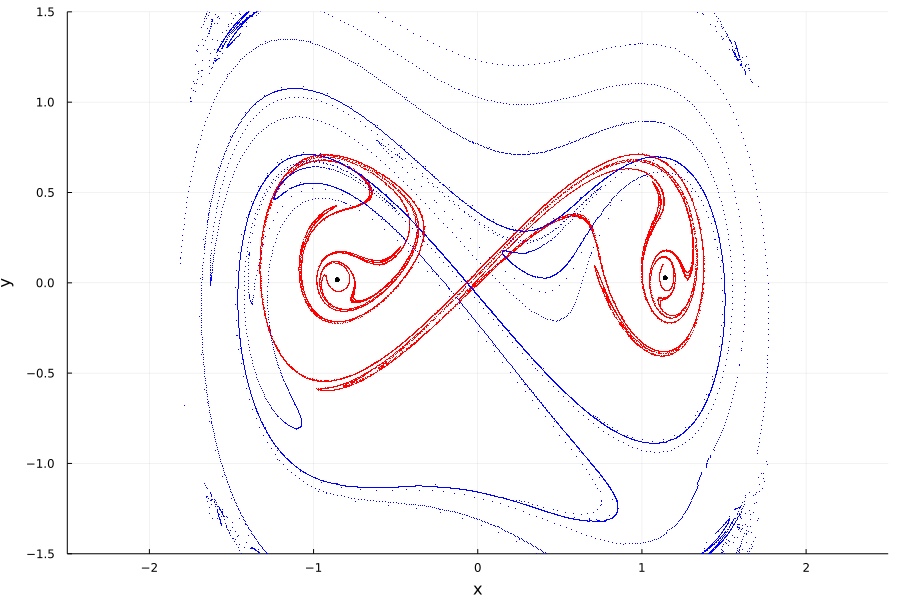

In [21]:
p = [0.14,1.0,0.14,1.0]
npts = 2500
us,conv = saddle_orbit2D(duffing_forced!,[-0.07,0.0],p,period)
if conv
    println(us)
    p1 = saddle_manifolds_forced(duffing_forced!,duffing_jac,us,p,period;ncycles=[6,3],npts=npts,delta=10^(-4))
    nld.poincare_forced!(p1,duffing_forced!,[1.2,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    nld.poincare_forced!(p1,duffing_forced!,[-0.8,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    xlims!(p1,(-2.5,2.5)); ylims!(p1,(-1.5,1.5))
end    

[-0.12010354054267611, 0.008483361246523229]


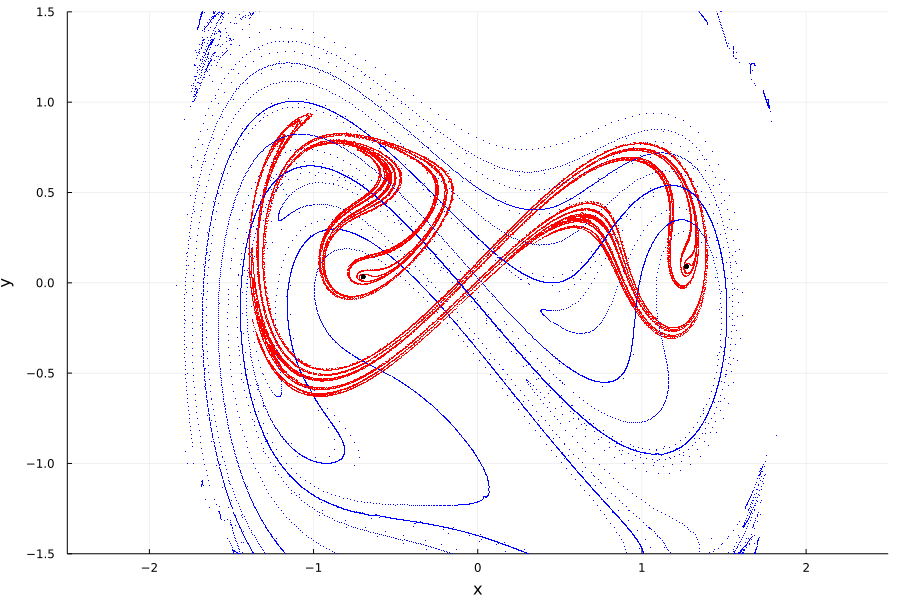

In [28]:
p = [0.14,1.0,0.24,1.0]
npts = 5500
us,conv = saddle_orbit2D(duffing_forced!,[-0.1,0.0],p,period)
if conv
    println(us)
    p1 =  saddle_manifolds_forced(duffing_forced!,duffing_jac,us,p,period;ncycles=[6,3],npts=npts,delta=10^(-4))
    nld.poincare_forced!(p1,duffing_forced!,[1.2,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    nld.poincare_forced!(p1,duffing_forced!,[-0.8,0.0,0.0],p, period; tcycles=40,ncycles=41,msize=3.0,col=:black)
    xlims!(p1,(-2.5,2.5)); ylims!(p1,(-1.5,1.5))
end    

[-0.1353256501987818, 0.009580796937766785]
194.264549 seconds (275.02 M allocations: 9.014 GiB, 0.74% gc time)


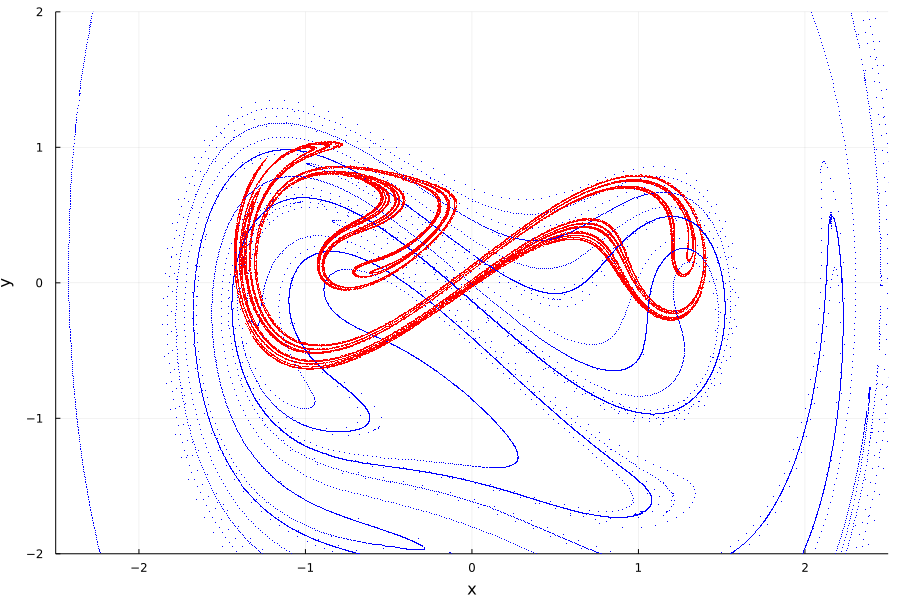

In [29]:
p = [0.14,1.0,0.27,1.0]
npts = 5500
us,conv = saddle_orbit2D(duffing_forced!,[-0.15,0.0],p,period)
if conv
    println(us)
    @time saddle_manifolds_forced(duffing_forced!,duffing_jac,us,p,period;ncycles=[6,3],npts=npts,delta=10^(-4),xlims=(-2.5,2.5),ylims=(-2.0,2.0))
end    

Lo que observamos es que a medida que se incrementa el parámetro $A$ cada vez hay mas cruces entre las variedades. Y cada cruce genera una órbita cerrada tipo saddle. 

